# Classification
This notebook will explore the data from the dataset that was created in `CRW_bleaching.ipynb`. 



## Useful libraries
In this notebook we use the following python libraries. If you are interested you can find more infromation about them in the links below:
- [Pandas](https://pandas.pydata.org/docs/user_guide/index.html#user-guide): Used for data manipulation and analysis
- [Matplotlib](https://matplotlib.org/stable/tutorials/index.html): Used to visualize data
- [Numpy](https://numpy.org/doc/stable/user/whatisnumpy.html): Used for mathematical operations on vectors and matrices.
- [Seaborn](https://seaborn.pydata.org/): Used to visualize statistical data
- [Scikit learn](https://scikit-learn.org/stable/user_guide.html): Used to pre-process and classify data

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from typing import List
warnings.filterwarnings('ignore')

## Read the table with information from the coral reefs

In [2]:
coral_reef_data_df = pd.read_csv('/home/jovyan/Ocean Data Platform Tutorials/data/NOAA Coral Reef Watch/bleaching_data.csv')

## Inspect data

In [3]:
# create a function that visualizes the distribution of the data points for columns
def plot_multiple_histograms(columns, dataframe):
    num_cols = len(columns)
    inspect_df = dataframe[columns]
    fig, ax = plt.subplots(1, num_cols, sharex='col', sharey='row', figsize=(30, 3))
    for i in range(num_cols):
        inspect_df.hist(column = inspect_df.columns[i], bins = 20, ax=ax[i])

### Inspect data that releates to bleaching

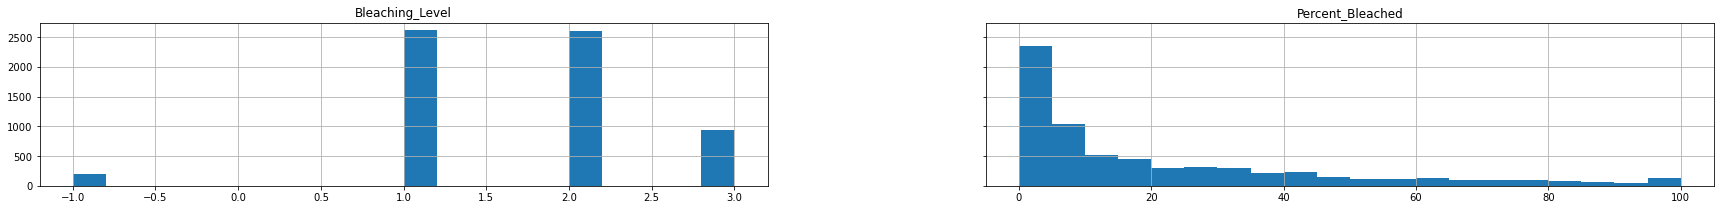

In [4]:
# Pick the columns that relate to bleaching data
bleaching_cols = ['Bleaching_Level', 'Percent_Bleached']

plot_multiple_histograms(columns=bleaching_cols, dataframe=coral_reef_data_df)

In [5]:
temp_df = coral_reef_data_df[bleaching_cols]
temp_df_not_na = temp_df[(temp_df['Bleaching_Level'].notna()) & (temp_df['Percent_Bleached'].notna())]
temp_df_not_na

,Bleaching_Level,Percent_Bleached
13,1.0,10.000000
14,1.0,8.000000
15,2.0,33.000000
16,1.0,8.000000
21,1.0,0.833333
...,...,...
6058,3.0,78.000000
6059,3.0,83.000000
6060,3.0,87.000000
6061,3.0,98.300000


In [6]:
c1 = []
c2 = []
c3 = []
for row in temp_df_not_na.iterrows():
    if row[1].Bleaching_Level == 1:
        c1.append(row[1].Percent_Bleached)
    elif row[1].Bleaching_Level == 2:
        c2.append(row[1].Percent_Bleached)
    elif row[1].Bleaching_Level == 3:
        c3.append(row[1].Percent_Bleached)

print(f"Bleaching level \t Number of entries \t Min \t Max")
print(f"1 \t\t\t {len(c1)} \t\t\t {np.min(c1)} \t {np.max(c1)}")
print(f"2 \t\t\t {len(c2)} \t\t\t {np.min(c2)} \t {np.max(c2)}")
print(f"3 \t\t\t {len(c3)} \t\t\t {np.min(c3)} \t {np.max(c3)}")
print(f"total \t\t\t {len(c1)+len(c2)+len(c3)}")

Bleaching level 	 Number of entries 	 Min 	 Max
1 			 700 			 0.1 	 10.0
2 			 1102 			 12.0 	 50.0
3 			 818 			 50.9 	 100.0
total 			 2620


We can observe that there are different measures of bleaching. Some rows only have entries for `Bleaching_Level`, while other rows only have entries for `Percent_Bleached`. Let us create a new column where we try to join the information from these two categories. 

#### Create a column in the table with categorical bleaching data based on information in `Bleaching_Level` and `Percent_Bleached`

In [7]:
# Remove rows where the `Bleaching_Level` is -1
coral_reef_data_df = coral_reef_data_df.where(coral_reef_data_df['Bleaching_Level'] != -1)

# Create a copy of the column `Bleaching_Level` and call it `Categorical_Percent_Bleached`
coral_reef_data_df['Categorical_Percent_Bleached'] = coral_reef_data_df['Bleaching_Level']



In [8]:
# TODO: double check what -1 means. Where should 0 be?

In [9]:
# Find rows where `Categorical_Percent_Bleached` is not set, and ´Percent_Bleached´ is between 0 and 15 and set the `Categorical_Percent_Bleached` to 1
coral_reef_data_df.loc[
    (
        (coral_reef_data_df['Categorical_Percent_Bleached'].isna()) & 
        (coral_reef_data_df['Percent_Bleached'] >= 0) & 
        (coral_reef_data_df['Percent_Bleached'] < 15)
    ), 
    'Categorical_Percent_Bleached'
] = 1

# Find rows where `Categorical_Percent_Bleached` is not set, and ´Percent_Bleached´ is between 15 and 50 and set the `Categorical_Percent_Bleached` to 2
coral_reef_data_df.loc[
    (
        (coral_reef_data_df['Categorical_Percent_Bleached'].isna()) & 
        (coral_reef_data_df['Percent_Bleached'] >= 15) & 
        (coral_reef_data_df['Percent_Bleached'] < 50)
    ), 
    'Categorical_Percent_Bleached'
] = 2

# Find rows where `Categorical_Percent_Bleached` is not set, and ´Percent_Bleached´ is above 50 and set the `Categorical_Percent_Bleached` to 3
coral_reef_data_df.loc[
    (
        (coral_reef_data_df['Categorical_Percent_Bleached'].isna()) & 
        (coral_reef_data_df['Percent_Bleached'] >= 50)
    ), 
    'Categorical_Percent_Bleached'
] = 3

# Drop rows where `Categorical_Percent_Bleached` is not set
coral_reef_data_df = coral_reef_data_df.dropna(subset=['Categorical_Percent_Bleached'])


array([[<AxesSubplot:title={'center':'Categorical_Percent_Bleached'}>]],
      dtype=object)

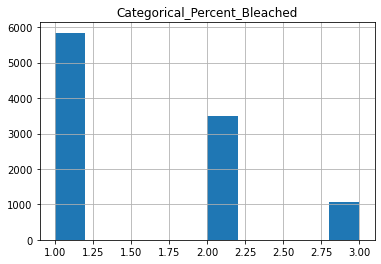

In [10]:
inspect_df = coral_reef_data_df[['Categorical_Percent_Bleached']]

inspect_df.hist()

### Inspect Temperature data

The temperature data is based on weekly Sea Surface Temperatures (SSTs) for the study time frame, created using a harmonics approach. Windspeed is also included in this data.

<details><summary>Open to view information about each Temperature parameter</summary>

|Parameter|Description|
|---|---|
|**Temperature_Kelvin**|SST in Kelvin.|
|**Temperature_Mean**|Mean SST in degrees Celsius.|
|**Temperature_Minimum**|Minimum SST in degrees Celsius.|
|**Temperature_Maximum**|Maximum SST in degrees Celsius.|
|**Temperature_Kelvin_Standard_Deviation**|Standard deviation of SST in Kelvin.|
|**Windspeed**|Meters per hour.|
</details>

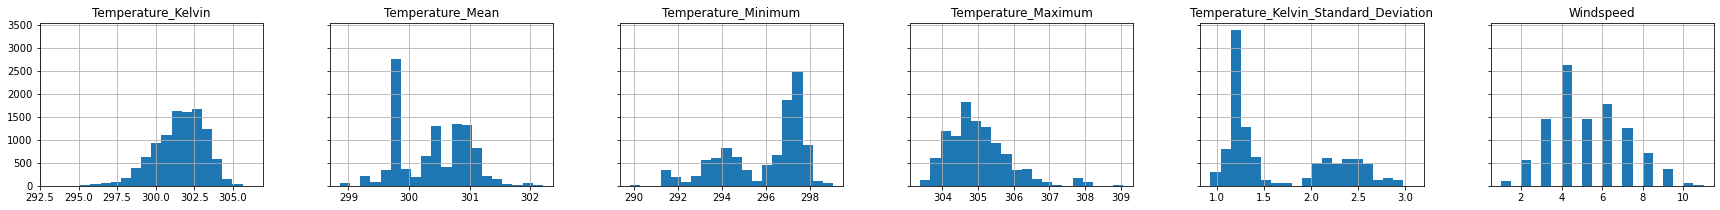

In [11]:
# Inspect Temperature data
temp_cols = ['Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum','Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation','Windspeed']
plot_multiple_histograms(columns=temp_cols, dataframe=coral_reef_data_df)

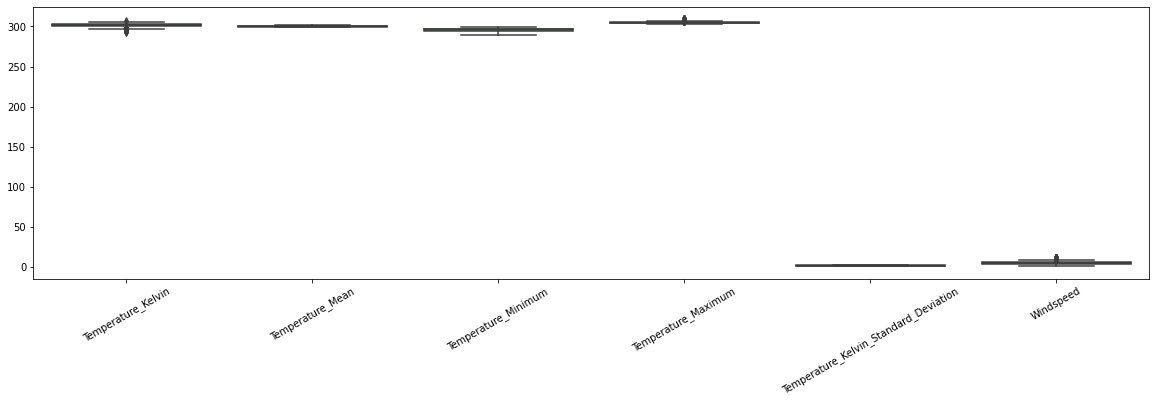

In [12]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=coral_reef_data_df[temp_cols])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

### Inspect Sea-Surface Temperature Anomaly (SSTA) data

The Sea-Surface Temperature Anomaly (SSTA) is the weekly SST minus weekly climatological SST in degrees Celsius.

SSTA_DHW (Sea-Surface Temperature Degree Heating Weeks) is the sum of the previous 12 weeks when SSTA >  = 1 degree Celsius.

<details><summary>Open to view information about each SSTA parameter</summary>

|Parameter|Description|
|---|---|
|**SSTA**|(Sea-Surface Temperature Anomaly) weekly SST minus weekly climatological SST.|
|**SSTA_Standard_Deviation**|The Standard Deviation of weekly SSTA in degrees Celsius over the entire period.|
|**SSTA_Mean**|The mean SSTA in degrees Celsius over the entire period.|
|**SSTA_Minimum**|The minimum SSTA in degrees Celsius over the entire period.|
|**SSTA_Maximum**|The maximum SSTA in degrees Celsius over the entire period.|
|**SSTA_Frequency**|(Sea Surface Temperature Anomaly Frequency) number of times over the previous 52 weeks that SSTA >  = 1 degree Celsius.|
|**SSTA_Frequency_Standard_Deviation**|The standard deviation of SSTA Frequency in degrees Celsius over the entire time period of 40 years.|
|**SSTA_FrequencyMax**|The maximum SSTA Frequency in degrees Celsius over the entire time period.|
|**SSTA_FrequencyMean**|The mean SSTA Frequency in degrees Celsius over the entire time period of 40 years.|
|-|-|
|**SSTA_DHW_Standard_Deviation**|The standard deviation SSTA DHW in degrees Celsius over the entire period.|
|**SSTA_DHWMax**|The maximum SSTA DHW in degrees Celsius over the entire time period of 40 years.|
|**SSTA_DHWMean**|The mean SSTA DHW in degrees Celsius over the entire time period of 40 years.|
    
</details>

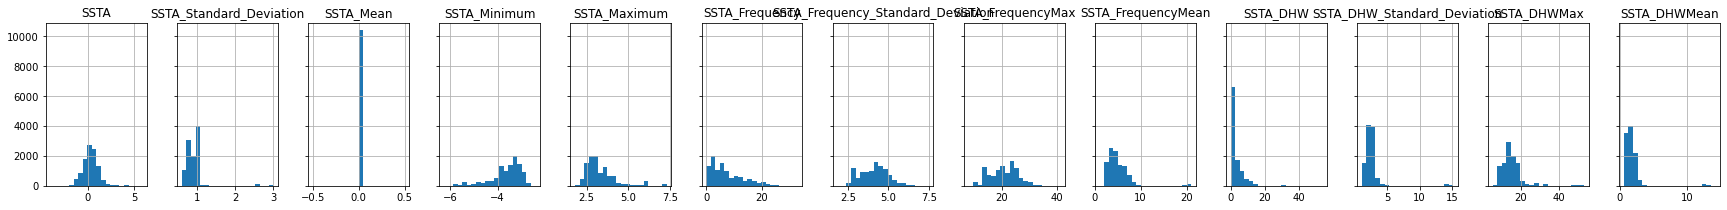

In [13]:
# Inspect SSTA data
ssta_cols = ['SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation','SSTA_DHWMax', 'SSTA_DHWMean',]
plot_multiple_histograms(columns=ssta_cols, dataframe=coral_reef_data_df)

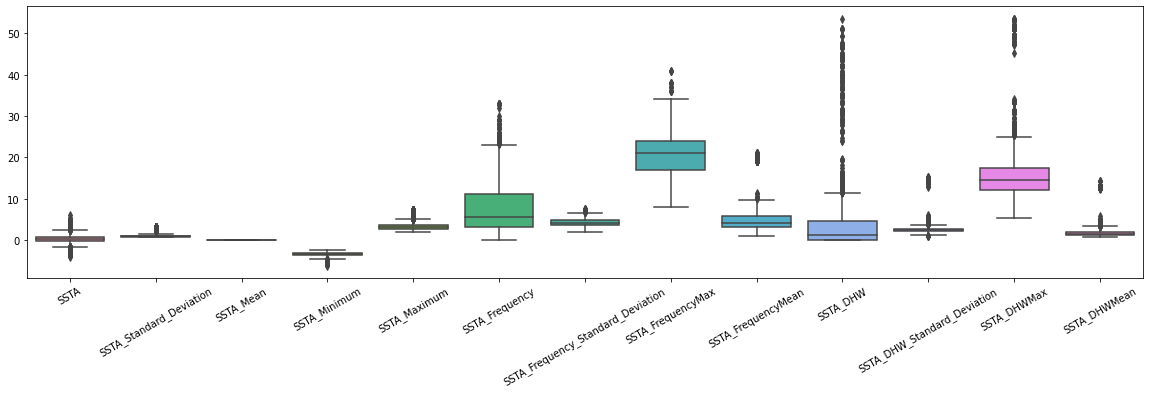

In [14]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=coral_reef_data_df[ssta_cols])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

### Inspect Thermal Stress Anomaly (TSA) data

Thermal stress disrupts the symbiotic relationship between the corals and the algae living in their tissues, which causes coral bleaching. [Read more here](https://oceanservice.noaa.gov/facts/coral_bleach.html#:~:text=When%20corals%20are%20stressed%20by,them%20to%20turn%20completely%20white.&text=Warmer%20water%20temperatures%20can%20result%20in%20coral%20bleaching.)

Thermal Stress Anomalies are defined as deviations of 1 week where the temperature was 1 degree Celsius or greater than the mean maximum climatological week(= the long term average warmest week from 1985 to 2005). 

`TSA_DHW` (Thermal Stress Anomaly - Degree Heating Week) is the sum of the previous 12 weeks when TSA >= 1 degree Celsius. 

<details><summary>Open to view information about each TSA parameter</summary>

|Parameter|Description|
|---|---|
|**TSA_Standard_Deviation**|The standard deviation of TSA in degrees Celsius over the entire time period of 40 years.|
|**TSA_Minimum**|The minimum TSA in degrees Celsius over the entire time period of 40 years.|  
|**TSA_Maximum**|The maximum TSA in degrees Celsius over the entire time period of 40 years.|
|**TSA_Mean**|The mean TSA in degrees Celsius over the entire time period of 40 years.|
|**TSA_Frequency**|The number of times over previous 52 weeks that TSA >= 1 degree Celsius.|  
|**TSA_Frequency_Standard_Deviation**|The standard deviation of frequency of TSA in degrees Celsius over the entire time period of 40 years.|  
|**TSA_FrequencyMax**|The maximum TSA frequency in degrees Celsius over the entire time period of 40 years.|  
|**TSA_FrequencyMean**|The mean TSA frequency in degrees Celsius over the entire time period of 40 years.|  
|-|-|
|**TSA_DHW**|Sum of previous 12 weeks when TSA >= 1 degree Celsius. |
|**TSA_DHW_Standard_Deviation**|The standard deviation of TSA DHW in degrees Celsius over the entire time period of 40 years.|
|**TSA_DHWMax**|The maximum TSA DHW in degrees Celsius over the entire time period of 40 years.|
|**TSA_DHWMean**|The mean TSA DHW in degrees Celsius over the entire time period of 40 years|
</details>

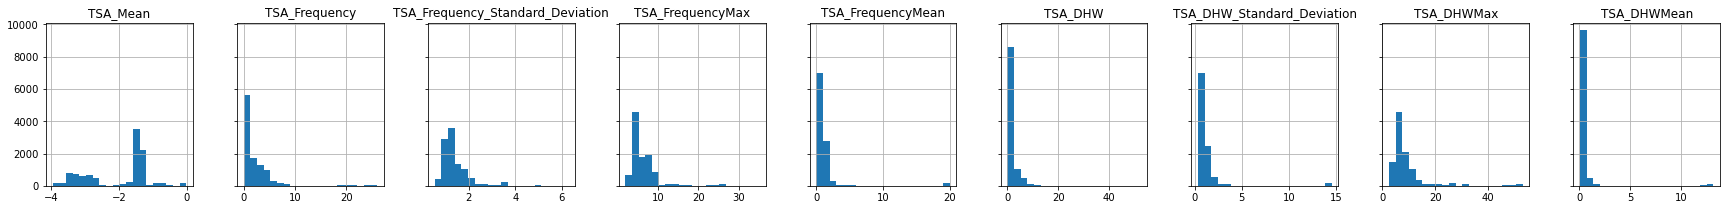

In [15]:
tsa_cols = ['TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean']
plot_multiple_histograms(columns=tsa_cols, dataframe=coral_reef_data_df)

# choose columns based on available data
tsa_cols = ['TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean']

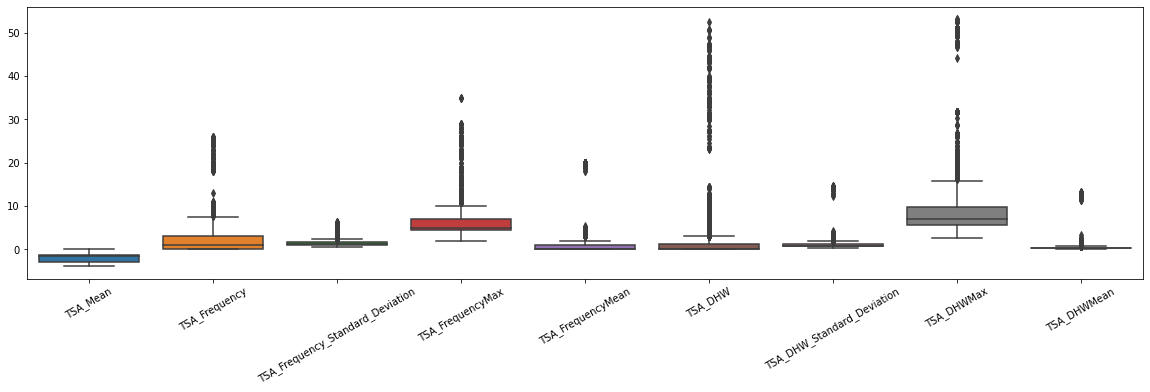

In [16]:
plt.figure(figsize=(20,5))
ax = sns.boxplot(data=coral_reef_data_df[tsa_cols])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

### Plot correlation

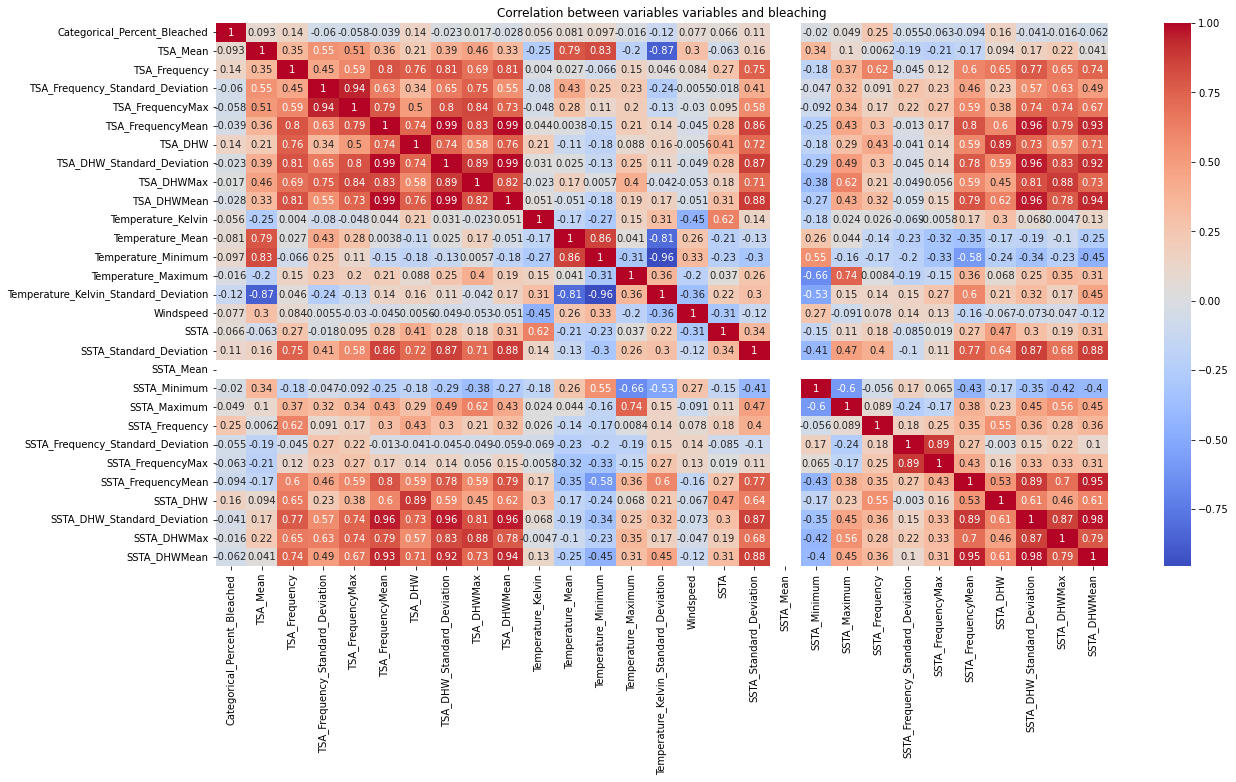

In [50]:
coral_reef_correlation = coral_reef_data_df[['Categorical_Percent_Bleached']+tsa_cols+temp_cols+ssta_cols].corr()
plt.figure(figsize=(20,10))
sns.heatmap(coral_reef_correlation, annot=True, cmap="coolwarm")
plt.title("Correlation between variables variables and bleaching")
plt.show()

### Relationship between two categorical values

<AxesSubplot:xlabel='SSTA_Frequency', ylabel='Categorical_Percent_Bleached'>

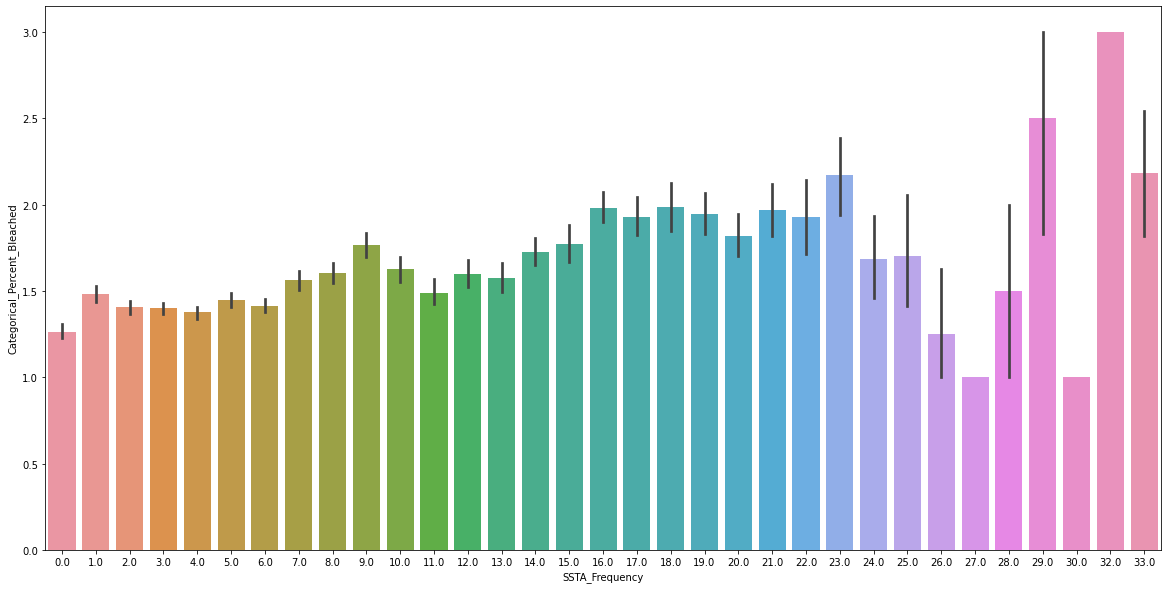

In [58]:
y_axis = coral_reef_data_df["Categorical_Percent_Bleached"]
x_axis = coral_reef_data_df["SSTA_Frequency"].round(0)

plt.figure(figsize=(20,10))
sns.barplot(x=x_axis, y=y_axis)

## Select features

In [61]:
# Drop rows that don't have a value for `Categorical_Percent_Bleached`
coral_reef_data_df = coral_reef_data_df.dropna(subset = 'Categorical_Percent_Bleached')
# Select features that can be used to classify. Are there any features that you wish to remove from our data?
chosen_columns = [
    'TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 
    'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 
    'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 
    'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 
    'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean'
]
print(chosen_columns)

features_df = coral_reef_data_df[chosen_columns]
features_df

['TSA_Mean', 'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax', 'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation', 'TSA_DHWMax', 'TSA_DHWMean', 'Temperature_Kelvin', 'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA', 'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation', 'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW', 'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean']


,TSA_Mean,TSA_Frequency,TSA_Frequency_Standard_Deviation,TSA_FrequencyMax,TSA_FrequencyMean,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Temperature_Kelvin,...,SSTA_Minimum,SSTA_Maximum,SSTA_Frequency,SSTA_Frequency_Standard_Deviation,SSTA_FrequencyMax,SSTA_FrequencyMean,SSTA_DHW,SSTA_DHW_Standard_Deviation,SSTA_DHWMax,SSTA_DHWMean
0,-1.53,0.0,1.18,5.0,0.0,0.0,0.80,6.69,0.23,302.48,...,-3.080000,2.49,0.0,5.17,27.0,4.0,0.00,2.71,18.89,1.43
1,-1.53,0.0,1.18,5.0,0.0,0.0,0.80,6.69,0.23,302.48,...,-3.080000,2.49,0.0,5.17,27.0,4.0,0.00,2.71,18.89,1.43
2,-1.48,0.0,1.00,3.0,0.0,0.0,0.77,4.28,0.26,300.79,...,-2.864286,2.80,3.0,4.74,25.0,4.0,1.01,2.49,16.89,1.44
3,-1.48,0.0,1.00,3.0,0.0,0.0,0.77,4.28,0.26,300.79,...,-2.864286,2.80,3.0,4.74,25.0,4.0,1.01,2.49,16.89,1.44
4,-2.80,3.0,1.41,6.0,1.0,0.0,1.08,8.60,0.36,298.16,...,-3.752222,3.49,6.0,4.88,25.0,7.0,0.00,3.09,19.21,2.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10589,-0.59,0.0,4.95,23.0,5.0,0.0,3.45,24.68,1.86,300.58,...,-3.576250,4.56,3.0,5.78,27.0,8.0,0.00,4.09,28.44,3.19
10590,-0.67,0.0,3.71,18.0,4.0,0.0,2.61,16.57,1.44,300.41,...,-3.478750,3.90,1.0,5.42,24.0,7.0,0.00,3.50,19.29,2.75
10591,-0.67,0.0,3.71,18.0,4.0,0.0,2.61,16.57,1.44,300.41,...,-3.478750,3.90,1.0,5.42,24.0,7.0,0.00,3.50,19.29,2.75
10592,-0.67,0.0,3.71,18.0,4.0,0.0,2.61,16.57,1.44,300.41,...,-3.478750,3.90,1.0,5.42,24.0,7.0,0.00,3.50,19.29,2.75


When training a supervised classifier, we need to provide it with data and the true bleaching category for each row. The data is denoted as `X`, and the ground truths are denoted as `y`.

In [68]:
X_df = features_df
X_df.fillna(0)
X = X_df.to_numpy()
X.shape

(10389, 28)

In [67]:
y_column = ['Categorical_Percent_Bleached']
y_df = coral_reef_data_df[y_column]
y = y_df.to_numpy().ravel()
y.shape

(10389,)

## Classifying

When using a supervised algorithm to classify data, it is necessary to provide the classifier with the correct class for each row in the data used for training the classifier. We therefore need to split our data into a training- and a test-dataset. The training data will be used by the classifier optimize it's result. The test-data will be used to evaluate the classifier on data it has not seen before. 

Below we have chosen a classifier called Linear Discriminant Analysis. More information about this classifier can be found [here](https://scikit-learn.org/stable/modules/lda_qda.html#estimation-algorithms).

In [69]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [70]:
# split the data into train and test
X = np.nan_to_num(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [72]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print(f"accuracy = {accuracy}")


accuracy = 0.5996150144369586


To find a good classifier, it can be necessary to try a few more, and to try to set the parameter of the classifier to something different. Below is a function that tests several classifiers. More information about the classifiers can be found [here](https://scikit-learn.org/stable/modules/multiclass.html).

In [71]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC #(setting multi_class=”crammer_singer”)
from sklearn.ensemble import RandomForestClassifier


def evaluate_classifier(clf, name):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
    print(f"{name} \t accuracy = {accuracy}")
    return accuracy, name


def evaluate_classifiers(classifiers, names):
    best_accuracy = 0
    best_accuracy_clf = None
    for clf, name in zip(classifiers, names):
        accuracy, clf_name = evaluate_classifier(clf, name)
        if accuracy > best_accuracy:
            best_accuracy = accuracy 
            best_accuracy_clf = clf_name
    print(f"\n\nBEST ACCURACY = {best_accuracy} \t {best_accuracy_clf}")
        
classifiers = [LinearDiscriminantAnalysis(), BernoulliNB(), GaussianNB(), DecisionTreeClassifier(), KNeighborsClassifier(n_neighbors=3), QuadraticDiscriminantAnalysis(), RandomForestClassifier(), SVC()]
names =       ['LDA',                       'BernoulliNB', 'GaussianNB','DecisionTreeClassifier',  'KNeighborsClassifier',             'QDA',                           'RandomForestClassifier', 'SVC']

evaluate_classifiers(classifiers, names)

LDA 	 accuracy = 0.5996150144369586
BernoulliNB 	 accuracy = 0.5365736284889316
GaussianNB 	 accuracy = 0.31520692974013476
DecisionTreeClassifier 	 accuracy = 0.5461982675649664
KNeighborsClassifier 	 accuracy = 0.5615976900866217
QDA 	 accuracy = 0.5279114533205005
RandomForestClassifier 	 accuracy = 0.5505293551491819
SVC 	 accuracy = 0.5577478344562079


BEST ACCURACY = 0.5996150144369586 	 LDA
